In [ ]:
'''Jonathan Zhang + Keshan Chen'''

#  Checkpoint #2 Report:

Problem to investigate:
    - "What parameters can help with battery health related issues?"

Based on the data/samples collected from the Battery DLL file, we found some parameters 
that we believe can influence battery health substantially for the checkpoint1. 

- ACPI-BATTERY(1) - # of batteries detected 
- ACPI-BATTERY(2) - Battery life %
- ACPI-BATTERY(6) - Chemistry
- ACPI-BATTERY(7) - Estimated runtime (s)
- ACPI-BATTERY(8) - Charge discharge rate
- ACPI-BATTERY(10) - Full charge capacity

In the checkpoint2, we created a new IL which could collect the battery related data. The API that we use is GetSystemPowerStatus function from Microsoft which could help us to collect data that we need, and the template that we use for generating IL is the static_standard_input template from the XLSDK guidebook. Then using "ESRV --device_control collect drivers" on the command line to run the whole solution file and get four types of data.  

The data that we choose are :
   
    - AC Status(0): 0 if the power is offline; 1 if the power is online; 255 if the status is unknown

    - Battery Life Percentage(1): The percentage of fully battery charge remaining(from 0 to 100, or 255 if status is unknown)

    - System Status Flag(2): 0 if the battery saver is off; 1 if the battery saver is on

    - Battery Life Time(3): Number of seconds of battery life remaining; or -1 if full battery lifetime is unknown or the device is connected to AC power

    [The descriptions above are from https://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_statushttps://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_status]
    
Reasonings :

    - We are primarily choosing to focus on these 4 parameters because we believe the answer to our problem, "what parameters can help with battery health related issues," lies within a relationship between one of these parameters. 
    - Also, by including the AC Status, we can analyze changes of Battery Life Percentage while the computer is charging as well as the computer power is offline. We'll import some figures representing the changes in the following part. 

The output of running the dll that we created is a database file, and we put it into the data folder. After collecting the data and getting the db file, we extract the counters_ull_time_data.csv from the db file and this csv file contains all the values of four types of data that we need. This report focuses on the data analysis of counters_ull_time_data.csv. 


# Checkpoint #1 Code for BATTERY:


#  Imports

In [1]:
import numpy as np
import pandas as pd

# Data Preparation

In [3]:
# Data for BATTERY
data = pd.read_csv("../data/temp/counters_ull_time_data.csv")

# COUNTERS_ULL_TIME_DATA.csv   --  Data Analysis

Data that we choose :

        - AC Status(0): 0 if the power is offline; 1 if the power is online; 255 if the status is unknown
        
        - Battery Life Percentage(1): The percentage of fully battery charge remaining(from 0 to 100, or 255 if status is unknown)
        
        - System Status Flag(2): 0 if the battery saver is off; 1 if the battery saver is on
        
        - Battery Life Time(3): Number of seconds of battery life remaining; or -1 if full battery lifetime is unknown or the device is connected to AC power
        
        [The descriptions above are from https://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_statushttps://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_status]
        

Reasonings : 
        - We are primarily choosing to focus on these 4 parameters because we believe the answer to our problem, "what parameters can help with battery health related issues," lies within a relationship between one of these parameters. 
        - Also, by including the AC Status, we can analyze changes of Battery Life Percentage while the computer is charging as well as the computer power is offline. We'll import some figures representing the changes in the following part. 


In [4]:
# Data Demographic

data['ID_INPUT'].value_counts()

3    5157
2    5157
1    5157
0    5157
Name: ID_INPUT, dtype: int64

In [5]:
data.head()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2020-11-21 00:49:47.838,0,1,0
1,2020-11-21 00:49:47.838,1,94,0
2,2020-11-21 00:49:47.838,2,0,0
3,2020-11-21 00:49:47.838,3,4294967295,0
4,2020-11-21 00:49:48.838,0,1,0


#### Organizing dataset

Since the data that we collect includes all values in the same column, to make it more clear to see, we choose to separate the values based on the ID_input and put them in a same row if the measurement_time is the same. 

Also since we don't need the measurement time for our analysis, the new dataset does not include the measurement time column. 

In [7]:
ac_status = data.loc[(data['ID_INPUT'] == 0)].reset_index()
battery_life = data.loc[(data['ID_INPUT'] == 1)].reset_index()
battery_saver = data.loc[(data['ID_INPUT'] == 2)].reset_index()
battery_time = data.loc[(data['ID_INPUT'] == 3)].reset_index()

In [8]:
d = {'AC': ac_status['VALUE'], 'Battery_life(%)': battery_life['VALUE'],
    'Battery_saver': battery_saver['VALUE'], 'Battery_time(seconds)': battery_time['VALUE']}
new_data = pd.DataFrame(data = d)
new_data.head()

,AC,Battery_life(%),Battery_saver,Battery_time(seconds)
0,1,94,0,4294967295
1,1,94,0,4294967295
2,1,94,0,4294967295
3,1,94,0,4294967295
4,1,94,0,4294967295


In [20]:
new_data['Battery_time(seconds)']

0       4294967295
1       4294967295
2       4294967295
3       4294967295
4       4294967295
           ...    
5152    4294967295
5153    4294967295
5154    4294967295
5155    4294967295
5156    4294967295
Name: Battery_time(seconds), Length: 5157, dtype: int64

In [17]:
battery_saver['VALUE'].unique()

array([0])

#### For more clear to see the changes of battery_life value and AC Status, we plot two figures to represent the changes for each type of input data. Since values of battery_saver are all 0s which means the battery saver was not on during the process of collecting the data, we don't need to do analysis for this input.  Also since the values of battery life time are too big to show on the same figure standard, we don't include the battery life time values in the figures. 

In [9]:
import matplotlib.pyplot as plt

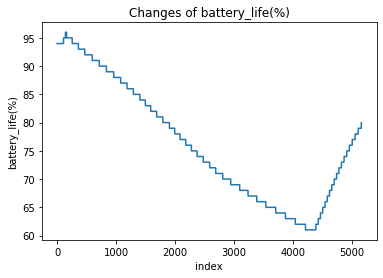

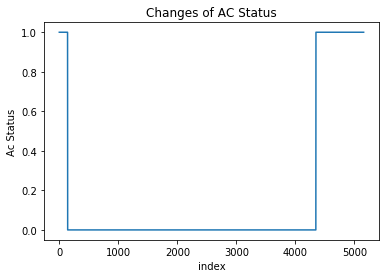

In [25]:
x = list(new_data.index)
y_1 = new_data['Battery_life(%)']
plt.figure(1)
plt.plot(x,y_1)
plt.title('Changes of battery_life(%)')
plt.xlabel('index')
plt.ylabel('battery_life(%)')

plt.figure(2)
y_2 = new_data['AC']
plt.plot(x,y_2)
plt.title('Changes of AC Status')
plt.xlabel('index')
plt.ylabel('Ac Status')

plt.show()

As we can see from the above figure, the battery_life was increasing then decreasing and then increasing, and the AC Status is changes from 1 to 0 and then from 0 to 1. 

The reason of those changes is that when we collected the data, at first we connected the AC power, so in the first part of changes, we can see that the values of battery_life status increasing and the values of AC status are equal to 1. Then we diconnected the AC power for a longer time, in this case we can see that the battery_life values status decreasing and the values of AC power are all equal to 0. After that, we reconnected the AC power and then we can see the values of battery_life is increasing and the values of AC status are equal to 1. 

One more thing that we found on the battery_life figures is that the slope of decreasing part is smaller than the increasing part. We can say that the battery_life has a more rapid change when the computer is connected to the AC Power. But our conclusion here might be lack of analysis since the battery_life is also related to the applications running on the computer when collect the data. 
